In [2]:
# Pre-requisites
import numpy as np
import time

# For plots
%matplotlib inline
import matplotlib.pyplot as plt

# To clear print buffer
from IPython.display import clear_output

# Importing functions from the previous tutorials:

In [3]:
# Initializing weight matrices from layer sizes
def initializeWeights(layers):
    weights = [np.random.randn(o, i+1) for i, o in zip(layers[:-1], layers[1:])]
    return weights

# Add a bias term to every data point in the input
def addBiasTerms(X):
        # Make the input an np.array()
        X = np.array(X)
        
        # Forcing 1D vectors to be 2D matrices of 1xlength dimensions
        if X.ndim==1:
            X = np.reshape(X, (1, len(X)))
        
        # Inserting bias terms
        X = np.insert(X, 0, 1, axis=1)
        
        return X

# Sigmoid function
def sigmoid(a):
    return 1/(1 + np.exp(-a))

# Forward Propagation of outputs
def forwardProp(X, weights):
    # Initializing an empty list of outputs
    outputs = []
    
    # Assigning a name to reuse as inputs
    inputs = X
    
    # For each layer
    for w in weights:
        # Add bias term to input
        inputs = addBiasTerms(inputs)
        
        # Y = Sigmoid ( X .* W^T )
        outputs.append(sigmoid(np.dot(inputs, w.T)))
        
        # Input of next layer is output of this layer
        inputs = outputs[-1]
        
    return outputs

# Compute COST (J) of Neural Network
def nnCost(weights, X, Y):
    # Calculate yPred
    yPred = forwardProp(X, weights)[-1]
    
    # Compute J
    J = 0.5*np.sum((yPred-Y)**2)/len(Y)
    
    return J

# IMPLEMENTING BACK-PROPAGATION WITH LEARNING RATE
# Added eta, the learning rate, as an input
def backProp(weights, X, Y, learningRate):
    # Forward propagate to find outputs
    outputs = forwardProp(X, weights)
    
    # For the last layer, bpError = error = yPred - Y
    bpError = outputs[-1] - Y
    
    # Back-propagating from the last layer to the first
    for l, w in enumerate(reversed(weights)):
        
        # Find yPred for this layer
        yPred = outputs[-l-1]
        
        # Calculate delta for this layer using bpError from next layer
        delta = np.multiply(np.multiply(bpError, yPred), 1-yPred)
        
        # Find input to the layer, by adding bias to the output of the previous layer
        # Take care, l goes from 0 to 1, while the weights are in reverse order
        if l==len(weights)-1: # If 1st layer has been reached
            xL = addBiasTerms(X)
        else:
            xL = addBiasTerms(outputs[-l-2])
        
        # Calculate deltaW for this layer
        deltaW = -np.dot(delta.T, xL)/len(Y)
        
        # Calculate bpError for previous layer to be back-propagated
        bpError = np.dot(delta, w)
        
        # Ignore bias term in bpError
        bpError = bpError[:,1:]
        
        # Change weights of the current layer (W <- W + eta*deltaW)
        w += learningRate*deltaW

# Evaluate the accuracy of weights for input X and desired outptut Y
def evaluate(weights, X, Y):
    yPreds = forwardProp(X, weights)[-1]
    # Check if maximum probability is from that neuron corresponding to desired class,
    # AND check if that maximum probability is greater than 0.5
    yes = sum( int( ( np.argmax(yPreds[i]) == np.argmax(Y[i]) ) and 
                    ( (yPreds[i][np.argmax(yPreds[i])]>0.5) == (Y[i][np.argmax(Y[i])]>0.5) ) )
              for i in range(len(Y)) )
    print(str(yes)+" out of "+str(len(Y))+" : "+str(float(yes/len(Y))))

# Initialize network
layers = [2, 2, 1]
weights = initializeWeights(layers)

print("weights:")
for i in range(len(weights)):
    print(i+1); print(weights[i].shape); print(weights[i])

# Declare input and desired output for AND gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [0], [0], [1]])

weights:
1
(2, 3)
[[-0.33589735 -0.396816    0.45849862]
 [-0.64374374 -2.41279823  0.78403628]]
2
(1, 3)
[[ 1.54182154 -0.12516091 -0.28203429]]


# Batch Gradient Descent

Batch Gradient Descent is how we have tried to train our network so far - give it ALL the data points, compute ${\Delta}W$s by summing up quantities across ALL the data points, change all the weights once, Repeat.

Suppose we want to train our 3-neuron network to implement Logical XOR.

Inputs are: $X=\left[\begin{array}{c}(0,0)\\(0,1)\\(1,0)\\(1,1)\end{array}\right]$, and the desired output is $Y=\left[\begin{array}{c}0\\1\\1\\0\end{array}\right]$.

We know that in order to train the network, we need to call backProp repeatedly. Let us use a function to do that.

In [4]:
# TRAINING FUNCTION, USING GD
def train(weights, X, Y, nIterations, learningRate=1):
    for i in range(nIterations):
        # Run backprop
        backProp(weights, X, Y, learningRate)
        
        # Clears screen output
        if (i+1)%(nIterations/10)==0:
            clear_output()
            print("Iteration "+str(i+1)+" of "+str(nIterations))
            # Prints Cost and Accuracy
            print("Cost: "+str(nnCost(weights, X, Y)))
            print("Accuracy:")
            evaluate(weights, X, Y)

In [5]:
# Initialize network
layers = [2, 2, 1]
weights = initializeWeights(layers)

print("weights:")
for i in range(len(weights)):
    print(i+1); print(weights[i].shape); print(weights[i])

# Take backup of weights to be used later for comparison
initialWeights = [np.array(w) for w in weights]

weights:
1
(2, 3)
[[ 0.04837515  0.26989845 -0.24049688]
 [ 0.40457749 -1.12764482  1.62391936]]
2
(1, 3)
[[-0.21690785 -0.77508326  0.61363791]]


In [6]:
# Declare input and desired output for XOR gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

In [7]:
# Check current accuracy and cost
print("Cost: "+str(nnCost(weights, X, Y)))
print("Accuracy: ")
evaluate(weights, X, Y)
print(forwardProp(X, weights)[-1])

Cost: 0.12907524705
Accuracy: 
2 out of 4 : 0.5
[[ 0.43886508]
 [ 0.49374299]
 [ 0.38577198]
 [ 0.4543426 ]]


Say we want to train our model 600 times.

In [8]:
nIterations = 400
train(weights, X, Y, nIterations)
print(forwardProp(X, weights)[-1])

Iteration 400 of 400
Cost: 0.124997811474
Accuracy:
3 out of 4 : 0.75
[[ 0.49895486]
 [ 0.50338071]
 [ 0.49407386]
 [ 0.4984321 ]]


In [9]:
# In case we want to revert the weight back
weights = [np.array(w) for w in initialWeights]

It took our function a long time to train.

What if we speed up using adaptive learning rate?

In [10]:
# TRAINING FUNCTION, USING GD
# Default learning rate = 1.0
def trainUsingGD(weights, X, Y, nIterations, learningRate=1.0):
    # Setting initial cost to infinity
    prevCost = np.inf
    
    # For nIterations number of iterations:
    for i in range(nIterations):
        # Run backprop
        backProp(weights, X, Y, learningRate)
        
        #clear_output()
        print("Iteration "+str(i+1)+" of "+str(nIterations))
        cost = nnCost(weights, X, Y)
        print("Cost: "+str(cost))
        
        # ADAPT LEARNING RATE
        # If cost increases
        if (cost > prevCost):
            # Halve the learning rate
            learningRate /= 2.0
        # If cost decreases
        else:
            # Increase learning rate by 5%
            learningRate *= 1.05
        
        prevCost = cost

In [11]:
# Revert weights back to initial values
weights = [np.array(w) for w in initialWeights]

In [12]:
# Train for nIterations
# Don't expect same results for running with 20 iterations
# as with running twice with 10 iterations - learning rates are different!
nIterations = 100
trainUsingGD(weights, X, Y, nIterations)

Iteration 1 of 100
Cost: 0.128848112614
Iteration 2 of 100
Cost: 0.128650869728
Iteration 3 of 100
Cost: 0.12848026395
Iteration 4 of 100
Cost: 0.128332996448
Iteration 5 of 100
Cost: 0.128205816336
Iteration 6 of 100
Cost: 0.128095601033
Iteration 7 of 100
Cost: 0.127999422128
Iteration 8 of 100
Cost: 0.12791459536
Iteration 9 of 100
Cost: 0.127838714376
Iteration 10 of 100
Cost: 0.12776966891
Iteration 11 of 100
Cost: 0.127705648793
Iteration 12 of 100
Cost: 0.127645135859
Iteration 13 of 100
Cost: 0.127586886153
Iteration 14 of 100
Cost: 0.127529905081
Iteration 15 of 100
Cost: 0.127473418103
Iteration 16 of 100
Cost: 0.127416839401
Iteration 17 of 100
Cost: 0.127359740627
Iteration 18 of 100
Cost: 0.127301821408
Iteration 19 of 100
Cost: 0.127242882839
Iteration 20 of 100
Cost: 0.127182804686
Iteration 21 of 100
Cost: 0.127121526616
Iteration 22 of 100
Cost: 0.127059033379
Iteration 23 of 100
Cost: 0.126995343612
Iteration 24 of 100
Cost: 0.126930501761
Iteration 25 of 100
Cost: 0.

We see that with adaptive learning rate, we reach the desired output much faster!

# MNIST Dataset

MNIST is a dataset of 60000 images of hand-written numbers.

In [13]:
# Load MNIST DATA
# Use numpy.load() to load the .npz file
f = np.load('mnist.npz')
# Saving the files
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']
f.close()

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)


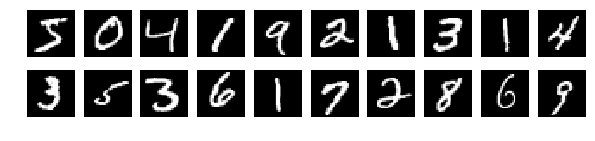

In [14]:
# To check MNIST data
print("x_train.shape = "+str(x_train.shape))
print("y_train.shape = "+str(y_train.shape))
fig = plt.figure(figsize=(10, 2))
for i in range(20):
    ax1 = fig.add_subplot(2, 10, i+1)
    ax1.imshow(x_train[i], cmap='gray');
    ax1.axis('off')

(In supervised learning) Every (good) dataset consists of a training set and a test set.

The training data set consists of data points and their desired outputs.

In this case, the data points are grayscale images of hand-written numbers, and their desired outputs are the numbers that have been drawn.

The test data set consists of data points whose outputs need to be found.

Let us implement the following neural network to classify MNIST data:
<center>![MNIST NN](images/digitsNN.png)

## Initialize network

MNIST dataset has images of size 28x28. So the input layer to our network must have $28*28=784$ neurons.

Since we are tring to classify whether the image is that of 0 or 1 or 2 ... or 9, we need to have 10 output neurons, each catering to the probability of one number among 0-9.

Let our hidden layer (as shown in the diagram) have 15 neurons.

Before initializing the network though, let's ensure our inputs and outputs are appropriate for the task at hand.

## Are our inputs in the right format and shape?

Remember that we give inputs as np.arrays of $n{\times}784$ dimensions, $n$ being the number of data points we want to input to the network.

Is ``x_train`` an np.array?

In [15]:
# Check type of x_train
type(x_train)

numpy.ndarray

Yup, ``x_train`` is an np.array

Is ``x_train`` in the shape required by the network?

In [16]:
# Check shape of x_train
x_train.shape

(60000, 28, 28)

Clearly not.

We need to reshape this matrix to $60000{\times}784$.

In [17]:
# Reshaping x_train and x_test for our network with 784 inputs neurons
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Check the dimensions
x_train.shape

(60000, 784)

Now our input is in the right format and shape.

## Are our inputs normalized?

Remember that we had decided to limit the range of values for the input to 0-1.

Are all the values of ``x_train`` between 0 and 1?

In [18]:
# Check range of values of x_train
print("Values in x_train lie between "+str(np.min(x_train))+" and "+str(np.max(np.max(x_train))))

Values in x_train lie between 0 and 255


Our inputs are images, their values range from 0 to 255. We need to bring them down to 0-1.

In [19]:
# Normalize x_train
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
# Check range of values of x_train
print("Values in x_train lie between "+str(np.min(x_train))+" and "+str(np.max(np.max(x_train))))

Values in x_train lie between 0.0 and 1.0


Perfect.

## Are our outputs in the right format and shape?

Is ``y_train`` an np.array?

In [21]:
# Check type of y_train
type(y_train)

numpy.ndarray

Yup, ``y_train`` is an np.array

Remember that we have 10 neurons in the output layer. That means our output needs to be of ${n{\times}10}$ dimensions.

Is the shape of ``y_train`` $n{\times}10$?

In [22]:
# Check shape of y_train
y_train.shape

(60000,)

Nope, ``y_train`` is of shape $60000{\times}1$

What are its values like?

In [23]:
for i in range(5):
    print(y_train[i])

5
0
4
1
9


So ``y_train`` carries the numbers of the digits the images represent.

We need to make a new binary array of $60000{\times}10$ and insert a 1 in the column corresponding to the number of the digit its image shows.

For example, the first row of our new y_train should look like $\left[\begin{array}{c}0&0&0&0&0&1&0&0&0&0\end{array}\right]$, since it represents 5. This is called one-hot encoding.

In [24]:
# Make new y_train of nx10 elements
new_y_train = np.zeros((len(y_train), 10))
for i in range(len(y_train)):
    new_y_train[i, y_train[i]] = 1

In [25]:
# Make new y_test of nx10 elements
new_y_test = np.zeros((len(y_test), 10))
for i in range(len(y_test)):
    new_y_test[i, y_test[i]] = 1

In [26]:
# Check first row of y_train
print(new_y_train[0])
print(new_y_test[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


Now that new_y_train is correctly shaped and formatted, let us reassign the name y_train to the matrix new_y_train.

In [27]:
# Reassign the name "y_train" to new_y_train
y_train = new_y_train
y_test = new_y_test

## Initialize the network

In [28]:
# Initialize network
layers = [784, 15, 10]
weights = initializeWeights(layers)

# Take backup of weights to be used later for comparison
initialWeights = [np.array(w) for w in weights]

In [29]:
# Please don't print the weights
# There are 15*784=11760 weights in the first layer,
# + 10*15=150 weights in the second layer
'''
print("weights:")
for i in range(len(weights)):
    print(i+1); print(weights[i].shape); print(weights[i])
'''


'\nprint("weights:")\nfor i in range(len(weights)):\n    print(i+1); print(weights[i].shape); print(weights[i])\n'

## Train the network

Use the proper inputs ``x_train`` and ``y_train`` to train your neural network.

How many iterations do you want to perform? How much should be the learning rate? Should it be adaptive? How many neurons per layer?

Remember that there are 60,000 images in the training set.

In [30]:
# Train the network using Gradient Descent
# Let's check how much time it takes for 1 iteration

# Set options
nIterations = 1
learningRate = 1.0

# Start time
start = time.time()

# Train
trainUsingGD(weights, x_train, y_train, nIterations, learningRate)

# End time
end = time.time()

print("Time: "+str(end - start)+" seconds")

Iteration 1 of 1
Cost: 1.97857726345
Time: 3.7738959789276123 seconds


See how it takes SO LONG for just one iteration?

**Problem: Batch Gradient Descent computes error, delta, etc. over the entire input data set**

Solution: Don't change weights over the entire data set, repeatedly use a randomly sampled subset of the data set.

This is called the Monte Carlo method, and in this case it has been developed into Stochastic Gradient Descent.

# Mini-batch Gradient Descent

We shall define a $minibatchSize$ lesser than the number of data points input to the network ($n$). Say $minibatchSize = 100$.

**Mini-batch GD**:

For every epoch:
- randomly group the input data set into mini-batches of ($minibatchSize=$) 100 images:
    - randomly shuffle the entire data set
    - consider every 100 images as one mini-batch - so there are ``int(n/minibatchSize)`` number of mini-batches
- use gradient descent on every mini-batch to update weights
- Repeat.

If $minibatchSize=n$, this is the same as Batch Gradient Descent.

If $minibatchSize=1$, i.e. we update the weights after backpropagating for only one image, it is called **Stochastic Grdient Descent**.

So, at every iteration we are using gradient descent on only $minibatchSize$ number of images.

Mathematical proofs exist on why this works better than gradient descent, under some assumptions (like stationarity, which holds true for our purposes).

Let's code Mini-batch Gradient Descent:

In [43]:
# TRAINING USING MINI-BATCH GRADIENT DESCENT
# Default learning rate = 1.0
def trainUsingMinibatchGD(weights, X, Y, minibatchSize, nEpochs, learningRate=1.0):
    # For nIterations number of iterations:
    for i in range(nEpochs):
        # clear output
        #clear_output()
        print("Epoch "+str(i+1)+" of "+str(nEpochs))
        
        # Make a list of all the indices
        fullIdx = list(range(len(Y)))
        
        # Shuffle the full index
        np.random.shuffle(fullIdx)
        
        # Count number of mini-batches
        nOfMinibatches = int(len(X)/minibatchSize)
        
        # For each mini-batch
        for m in range(nOfMinibatches):
            # Compute the starting index of this mini-batch
            startIdx = m*minibatchSize
            
            # Declare sampled inputs and outputs
            xSample = X[fullIdx[startIdx:startIdx+minibatchSize]]
            ySample = Y[fullIdx[startIdx:startIdx+minibatchSize]]

            # Run backprop
            backProp(weights, xSample, ySample, learningRate)

Using MinibatchGD, training upto the same accuracy should take lesser time than GD.

In [44]:
# Initialize network
layers = [784, 30, 10]
weights = initializeWeights(layers)

# Take backup of weights to be used later for comparison
initialWeights = [np.array(w) for w in weights]

In [45]:
# Evaluate initial weights on training data
evaluate(weights, x_train, y_train)

5570 out of 60000 : 0.09283333333333334


In [46]:
# Evaluate initial weights on test data
evaluate(weights, x_test, y_test)

948 out of 10000 : 0.0948


- Let's first use Batch Gradient Descent ($minibatchSize = size\;of \;full\;input$) to evaluate the accuracy and time with one iteration 

In [47]:
# Train the network ONCE using Batch Gradient Descent to check accuracy and time

# Re-initialize weights
weights = [np.array(w) for w in initialWeights]

# Set options for batch gradient descent
minibatchSize = len(y_train)
nEpochs = 1
learningRate = 3.0

# Start time
start = time.time()

# Train
trainUsingMinibatchGD(weights, x_train, y_train, minibatchSize, nEpochs, learningRate)

# End time
end = time.time()

# Evaluate accuracy
print("Training accuracy:")
evaluate(weights, x_train, y_train)
print("Test accuracy:")
evaluate(weights, x_test, y_test)

# Print time taken
print("Time: "+str(end-start)+" seconds")

Epoch 1 of 1
Training accuracy:
5889 out of 60000 : 0.09815
Test accuracy:
1012 out of 10000 : 0.1012
Time: 2.8622570037841797 seconds


- Okay, let's check with Stochastic Gradient Descent, i.e. $minibatchSize = 1$

In [48]:
# Train the network ONCE using Stochastic Gradient Descent to check accuracy and time

# Re-initialize weights
weights = [np.array(w) for w in initialWeights]

# Set options of stochastic gradient descent
minibatchSize = 1
nEpochs = 1
learningRate = 3.0

# Start time
start = time.time()

# Train
trainUsingMinibatchGD(weights, x_train, y_train, minibatchSize, nEpochs, learningRate)

# End time
end = time.time()

# Evaluate accuracy
print("Training accuracy:")
evaluate(weights, x_train, y_train)
print("Test accuracy:")
evaluate(weights, x_test, y_test)

# Print time taken
print("Time: "+str(end-start)+" seconds")

Epoch 1 of 1
Training accuracy:
44816 out of 60000 : 0.7469333333333333
Test accuracy:
7539 out of 10000 : 0.7539
Time: 21.746292114257812 seconds


Stochastic Gradient Descent took more time, but gave much better accuracy in just 1 epoch.

- Let's now check for Mini-batch Gradient Descent, with $minibatchSize = $ (say) $10$

In [49]:
# Train the network ONCE using Mini-batch Gradient Descent to check accuracy and time

# Re-initialize weights
weights = [np.array(w) for w in initialWeights]

# Set options of mini-batch gradient descent
minibatchSize = 10
nEpochs = 1
learningRate = 3.0

# Start time
start = time.time()

# Train
trainUsingMinibatchGD(weights, x_train, y_train, minibatchSize, nEpochs, learningRate)

# End time
end = time.time()

# Evaluate accuracy
print("Training accuracy:")
evaluate(weights, x_train, y_train)
print("Test accuracy:")
evaluate(weights, x_test, y_test)

# Print time taken
print("Time: "+str(end-start)+" seconds")

Epoch 1 of 1
Training accuracy:
52428 out of 60000 : 0.8738
Test accuracy:
8752 out of 10000 : 0.8752
Time: 4.0647711753845215 seconds


Thus, (in 1 epoch) Mini-batch Gradient descent gives comparable accuracy to Stochastic Gradient Descent, which is much better than the accuracy given by Batch Gradient Descent, in much lesser time.

## Classifying MNIST data set

Let us try to classify the MNIST data set up to more than 99%. This means deciding the number of layers, size of each layer, number of Epochs, the mini-batch size, and the learning (constant, for now).

Let us try, $layers = [784$ (input layer, because each MNIST image is 28$x$28)$, 30$ (hidden layer)$, 10$ (outputs layer, one neuron for each digit)$], nEpochs = 30, minibatchSize = 10, learningRate = 3.0$

In [55]:
# TRAIN A NETWORK TO CLASSIFY MNIST

# Initialize network
layers = [784, 30, 10]
weights = initializeWeights(layers)

# Take backup of weights to be used later for comparison
initialWeights = [np.array(w) for w in weights]

# Set options of mini-batch gradient descent
minibatchSize = 10
nEpochs = 50
learningRate = 3.0

# Train
trainUsingMinibatchGD(weights, x_train, y_train, minibatchSize, nEpochs, learningRate)

# Evaluate accuracy
print("Training accuracy:")
evaluate(weights, x_train, y_train)
print("Test accuracy:")
evaluate(weights, x_test, y_test)

Epoch 1 of 50
Epoch 2 of 50
Epoch 3 of 50
Epoch 4 of 50
Epoch 5 of 50
Epoch 6 of 50
Epoch 7 of 50
Epoch 8 of 50
Epoch 9 of 50
Epoch 10 of 50
Epoch 11 of 50
Epoch 12 of 50
Epoch 13 of 50
Epoch 14 of 50
Epoch 15 of 50
Epoch 16 of 50
Epoch 17 of 50
Epoch 18 of 50
Epoch 19 of 50
Epoch 20 of 50
Epoch 21 of 50
Epoch 22 of 50
Epoch 23 of 50
Epoch 24 of 50
Epoch 25 of 50
Epoch 26 of 50
Epoch 27 of 50
Epoch 28 of 50
Epoch 29 of 50
Epoch 30 of 50
Epoch 31 of 50
Epoch 32 of 50
Epoch 33 of 50
Epoch 34 of 50
Epoch 35 of 50
Epoch 36 of 50
Epoch 37 of 50
Epoch 38 of 50
Epoch 39 of 50
Epoch 40 of 50
Epoch 41 of 50
Epoch 42 of 50
Epoch 43 of 50
Epoch 44 of 50
Epoch 45 of 50
Epoch 46 of 50
Epoch 47 of 50
Epoch 48 of 50
Epoch 49 of 50
Epoch 50 of 50
Training accuracy:
58180 out of 60000 : 0.9696666666666667
Test accuracy:
9397 out of 10000 : 0.9397


About 93%-95%.. What if we increase the mini-batch size?

In [59]:
# TRAIN A NETWORK TO CLASSIFY MNIST

# Initialize network
layers = [784, 10, 10, 10]
weights = initializeWeights(layers)

# Take backup of weights to be used later for comparison
initialWeights = [np.array(w) for w in weights]

# Set options of mini-batch gradient descent
minibatchSize = 10
nEpochs = 30
learningRate = 3.0

# Train
trainUsingMinibatchGD(weights, x_train, y_train, minibatchSize, nEpochs, learningRate)

# Evaluate accuracy
print("Training accuracy:")
evaluate(weights, x_train, y_train)
print("Test accuracy:")
evaluate(weights, x_test, y_test)

Epoch 1 of 10
Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10
Training accuracy:
53245 out of 60000 : 0.8874166666666666
Test accuracy:
8846 out of 10000 : 0.8846


## Coming up next

In the next tutorial, we shall see the different types of optimizations that can be done in gradient descent, and compare their performances.